In [188]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Importing and Cleaning the database

In [41]:
df = pd.read_csv("overall.csv")
del df["Unnamed: 0"]

df['year'] = df['term'].apply(lambda x: x[0:7])
df['term'] = df['term'].apply(lambda x: x[8:])
df["before_process_vacancy"].replace(0, np.nan, inplace = True)
df.dropna(inplace = True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132000 entries, 1 to 217811
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   term                    132000 non-null  object 
 1   session                 132000 non-null  object 
 2   bidding_window          132000 non-null  object 
 3   course_code             132000 non-null  object 
 4   description             132000 non-null  object 
 5   section                 132000 non-null  object 
 6   vacancy                 132000 non-null  int64  
 7   opening_vacancy         132000 non-null  int64  
 8   before_process_vacancy  132000 non-null  float64
 9   dice                    132000 non-null  int64  
 10  after_process_vacancy   132000 non-null  int64  
 11  enrolled_students       132000 non-null  int64  
 12  median_bid              132000 non-null  float64
 13  min_bid                 132000 non-null  float64
 14  instructor          

# Analysis

## Filtering relevant modules

In [142]:
stat201 = df[df['course_code'] == 'STAT201']
cor1305 = df[df['course_code'] == 'COR1305']
econ252 = df[df['course_code'] == 'ECON252']
dsa212 = df[df.loc(axis = 1)['course_code'] == 'DSA212']
is105 = df[df['course_code'] == 'IS105']
cor3301 = df[df['course_code'] == 'COR3301']
mgmt102 = df[df['course_code'] == 'MGMT102']

modf = cor3301

## Filter relevant details

In [148]:
section_update = modf['section'].apply(lambda x: 1)
mod_filter = modf
mod_filter.loc[:, 'section'] = section_update

mod_grouped = mod_filter.groupby(['year', 'term', 'bidding_window']).agg({'section': 'sum','before_process_vacancy': 'sum', 'after_process_vacancy': 'sum', 'median_bid' : 'mean', 'min_bid' : 'mean'})
mod_grouped = mod_grouped.reset_index()

C:\Users\bhara\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


array([' MAKOTO HONG CHENG', ' SAMUEL NG', ' HENRY GAO',
       ' JEREMY LEONG ZHI JIA', ' ELGIN TAY', ' LEE CHIA MING',
       ' ONG EE ING', ' NICK CHIAM', ' LOO WEE LING', ' PASHA HSIEH',
       ' MALAVIKA JAYARAM', ' LIM HOW KHANG', ' GEROME GOH',
       ' NGUYEN SINH VUONG'], dtype=object)

In [149]:
mod_filter.describe()

,section,vacancy,opening_vacancy,before_process_vacancy,dice,after_process_vacancy,enrolled_students,median_bid,min_bid
count,342.0,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,1.0,44.903509,43.298246,6.356725,0.017544,1.166667,42.131579,23.040614,20.778129
std,0.0,0.333012,2.391075,11.256341,0.131479,1.767663,2.531374,21.439259,20.078349
min,1.0,43.000000,38.000000,-1.000000,0.000000,-1.000000,25.000000,0.000000,0.000000
25%,1.0,45.000000,42.000000,1.000000,0.000000,0.000000,40.250000,0.000000,0.000000
50%,1.0,45.000000,45.000000,2.000000,0.000000,0.000000,43.000000,22.665000,17.750000
75%,1.0,45.000000,45.000000,4.000000,0.000000,2.000000,44.000000,41.000000,38.850000
max,1.0,45.000000,45.000000,43.000000,1.000000,15.000000,45.000000,83.850000,66.600000


## Scatter Plot

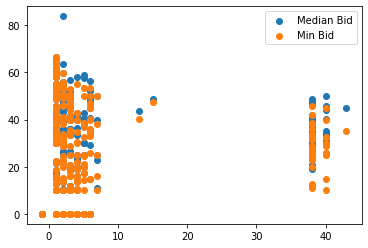

In [145]:
plt.scatter(mod_filter['before_process_vacancy'], mod_filter['median_bid'], label = 'Median Bid')
plt.scatter(mod_filter['before_process_vacancy'], mod_filter['min_bid'], label = 'Min Bid')

plt.legend()
plt.show()

## Boxplot

<AxesSubplot:>

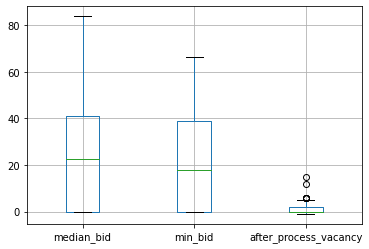

In [95]:
mod_filter.boxplot(['median_bid', 'min_bid', 'after_process_vacancy'])

## Lineplot

<AxesSubplot:xlabel='year', ylabel='median_bid'>

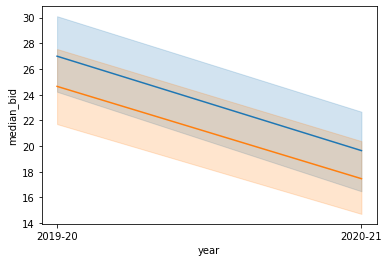

In [96]:
sns.lineplot(data = mod_filter, x = 'year', y = 'median_bid')
sns.lineplot(data = mod_filter, x = 'year', y = 'min_bid')

## RegPlot

<AxesSubplot:xlabel='before_process_vacancy', ylabel='after_process_vacancy'>

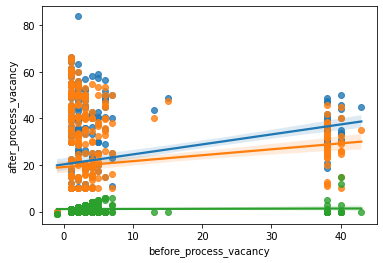

In [97]:
sns.regplot(data = mod_filter, x = 'before_process_vacancy', y = 'median_bid')
sns.regplot(data = mod_filter, x = 'before_process_vacancy', y = 'min_bid')
sns.regplot(data = mod_filter, x = 'before_process_vacancy', y = 'after_process_vacancy')

<AxesSubplot:xlabel='section', ylabel='after_process_vacancy'>

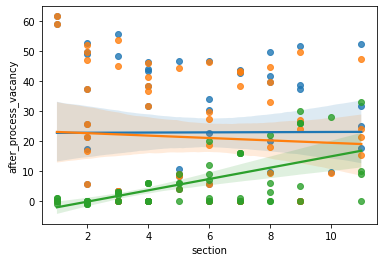

In [150]:
sns.regplot(data = mod_grouped, x = 'section', y = 'median_bid')
sns.regplot(data = mod_grouped, x = 'section', y = 'min_bid')
sns.regplot(data = mod_grouped, x = 'section', y = 'after_process_vacancy')

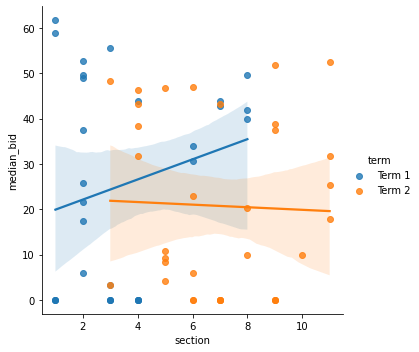

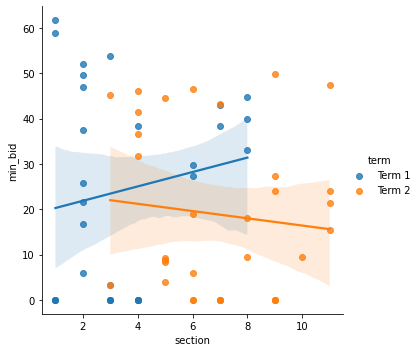

In [151]:
sns.lmplot(data = mod_grouped, x = 'section', y = 'median_bid', hue = 'term')
sns.lmplot(data = mod_grouped, x = 'section', y = 'min_bid', hue = 'term')

## SKLEARN

### Linear Regression for individual sections

In [181]:
model = LinearRegression()

X = mod_filter[['before_process_vacancy']]
Y = mod_filter[['median_bid']]

model.fit(X,Y)

predictions = model.predict(X)

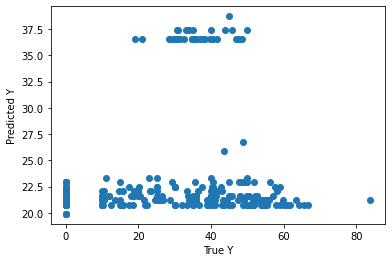

In [182]:
ax = plt.axes()
plt.scatter(x = Y, y = predictions.flatten())
ax.set_xlabel('True Y')
ax.set_ylabel('Predicted Y')
plt.show()

In [183]:
print("r2: {}\n rmse = {}".format(r2_score(Y, predictions), mean_squared_error(Y, predictions)**0.5))

r2: 0.05048452709589879
 rmse = 20.860510725884957


### Linear Regression for aggregated sections

In [184]:
model = LinearRegression()

X = mod_grouped[['before_process_vacancy', 'section']]
Y = mod_grouped[['after_process_vacancy']]

model.fit(X, Y)

coeff_parameter = pd.DataFrame(np.transpose(model.coef_),X.columns,columns=['Coefficient'])

predictions = model.predict(X)

coeff_parameter

,Coefficient
before_process_vacancy,-0.008346
section,1.984860


In [185]:
print("r2: {}\n rmse = {}".format(r2_score(Y, predictions), mean_squared_error(Y, predictions)**0.5))

r2: 0.3702964654547347
 rmse = 7.088944918379312


### Decision Trees for individual sections

In [231]:
from sklearn import tree

X = mod_filter[['before_process_vacancy']]
Y = mod_filter[['median_bid', 'min_bid', 'after_process_vacancy']]

# List of values to try for max_depth:
max_depth_range = list(range(1, 20))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = tree.DecisionTreeRegressor(max_depth = depth, 
                             random_state = 0)
    clf.fit(X, Y)
    score = clf.score(X, Y)
    accuracy.append(score)

i = accuracy.index(max(accuracy))

clf = tree.DecisionTreeRegressor(max_depth = i)
clf = clf.fit(X, Y)

predictions = clf.predict(X)

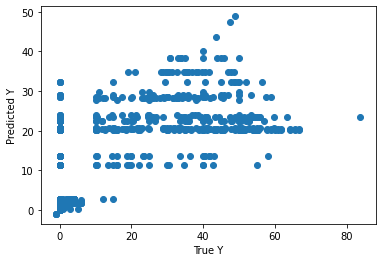

In [234]:
ax = plt.axes()
plt.scatter(Y, predictions)
ax.set_xlabel('True Y')
ax.set_ylabel('Predicted Y')
plt.show()

In [235]:
print("r2: {}\n rmse = {}".format(r2_score(Y, predictions), mean_squared_error(Y, predictions)**0.5))

r2: 0.13424406329275043
 rmse = 16.196064867390213


### Decision Trees for aggregated sections

In [236]:
from sklearn import tree

X = mod_grouped[['before_process_vacancy', 'section']]
Y = mod_grouped[['median_bid', 'min_bid', 'after_process_vacancy']]

#Optimizing max_depth of tree for maximum r2 score

# List of values to try for max_depth:
max_depth_range = list(range(1, 20))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = tree.DecisionTreeRegressor(max_depth = depth, 
                             random_state = 0)
    clf.fit(X, Y)
    score = clf.score(X, Y)
    accuracy.append(score)

i = accuracy.index(max(accuracy))

clf = tree.DecisionTreeRegressor(max_depth = i)
clf = clf.fit(X, Y)

predictions = clf.predict(X)

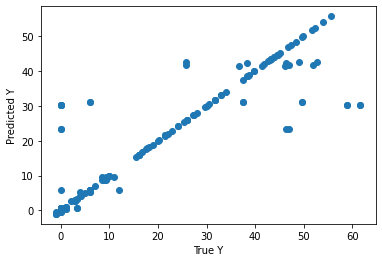

In [237]:
ax = plt.axes()
plt.scatter(Y, predictions)
ax.set_xlabel('True Y')
ax.set_ylabel('Predicted Y')
plt.show()

In [238]:
print("r2: {}\n rmse = {}".format(r2_score(Y, predictions), mean_squared_error(Y, predictions)**0.5))

r2: 0.8372727190485203
 rmse = 8.065802487105382


# Curve-fitting

 Popt:  [ 1.93103936e+01 -1.03738011e-02] 
 Pcov:  [[1.43166973e+00 2.36657167e-03]
 [2.36657167e-03 1.24784849e-05]]


C:\Users\bhara\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


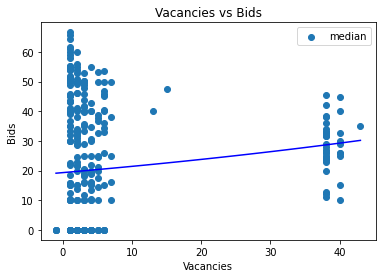

Perr:  [1.19652402 0.00353249]


In [243]:
# This is an exercise in nonlinear regression using OLS but apparently unsuitable for the dataset

from scipy.optimize import curve_fit
def func(x,a,b):
    return a*np.exp(-b*x)

xdata = mod_filter['before_process_vacancy']
ydata = mod_filter['min_bid']
popt, pcov = curve_fit(func, xdata, ydata)

print(' Popt: ', popt, '\n', 'Pcov: ', pcov)

ax = plt.axes()
plt.scatter(mod_filter['before_process_vacancy'], mod_filter['min_bid'], label = 'median')
x_plot=np.linspace(mod_filter.before_process_vacancy.min(), mod_filter.before_process_vacancy.max())
plt.plot(x_plot, func(x_plot, *popt), 'b-')
plt.title('Vacancies vs Bids')
ax.set_xlabel('Vacancies')
ax.set_ylabel('Bids')

perr = np.sqrt(np.diag(pcov))

plt.legend()
plt.show()

print('Perr: ', perr)